## Hypothesis Testing Exercises

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

<font color = 'red'>**Has the network latency gone up since we switched internet service providers?**<font color = 'black'>

**null hypothesis:**
There is no significant difference in network latency since we switched internet service providers.
    

 **alternative hypothesis:**
There is a difference in network latency since we switched internet service providers.   -- "The new ISP has higher latency"
    
    
 **True Positive:**
We switch providers and network latency has increased.  (we reject null)
    
    
**True Negative:**
We switched providers and there wasn't much difference in latency (we fail to reject the null)

**Type I Error: (False Positive)**-- no wolf!
The latency has increased, but maybe because we're checking at peak hours (reject null)
    

**Type II: (False Negative)**
Not much difference, but maybe because we took the reading during a time when traffic is unusually slow. (fail to reject null)



<font color = 'red'>**Is the website redesign any good?**<font color = 'black'>
    
I'd like more information - what are you measuring here -- what makes it better?  More time, more clicks, less need for help?
    
**Null:** 
There is no difference in traffic between the old and new websites.

    
**Alternative:** 
Website traffic (more) has changed since the website was redesigned.  

    
**True Positive:**
The network traffic has increased since the website redesign  -- we think it helped -- and it really did (reject null)
   
    
**True Negative:**
The network traffic has not increased since the website redesign -- (fail to reject null)
    

**Type I Error  (False Positive):**
We think it helped, but it didn't  (reject null)
    

**Type II   (False Negative):** 
We think it didn't help, but it really did.  (maybe we got negative feedback from some users) (fail to reject null)




<font color = 'red'>**Is our television ad driving more sales?**

**Null:**
There is no difference in sales of our product since we began advertising on television. 
    
    
**Alternative:** 
Our product sales changed (increased) since we began advertising on television. 

    
**True Positive:**
We think that the ad helped and it really did (reject null)
   
    
**True Negative:**
we think the ad didn't help -- and it really didn't -- (fail to reject null)
    

**Type I Error  (False Positive):**
We think it helped, but it didn't  (reject null)
    

**Type II   (False Negative):** 
We think it didn't help, but it really did. (fail to reject null)


    
    

### T-Test Exercises

In [48]:
from pydataset import data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

**<font color = 'red'>Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. <font color = 'black'>**
* A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
* A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
* Use a .05 level of significance.



In [51]:
#we are comparing -- average time (numberic continuous values) to sell for two different groups (categories)

# two sample, two tailed

null_hypothesis = "There is no difference in the average time it takes to sell homes for the two offices."
alt_hypothesis = "The average time to sell a home for the two offices is different."

mean1 = 90
std1 = 15
nobs1 = 40

mean2 = 100
std2 = 20
nobs2 = 50


confidence_level = 0.95
a = 0.5

t, p = stats.ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2)
t, p


(-2.6252287036468456, 0.01020985244923939)

In [54]:
if (p/2) < a:
    print("We reject the null hypothesis that the average home sale time is the same for both offices.")
else: 
    print("We fail to reject the null hypothesis. This means that we don't have sufficient evident to support the claim.")

We reject the null hypothesis that the average home sale time is the same for both offices.


Load the mpg dataset and use it to answer the following questions:

* Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

* Are compact cars more fuel-efficient than the average car?

* Do manual cars get better gas mileage than automatic cars?

In [56]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


* <font color = 'red'>Is there a difference in fuel-efficiency in cars from 2008 vs 1999?<font color = 'black'>

In [57]:
null_hypothesis = "There is no difference in the fuel-efficiency of cars from 2008 and cars from 1999."
alternative_hypothesis = "There is a difference in the fuel-efficiency of cars from 2008 and cars from 1999."
confidence_level = .95
a = 1 - confidence_level


mpg["average_mpg"] = (mpg['cty'] + mpg['hwy'])/2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


<AxesSubplot:>

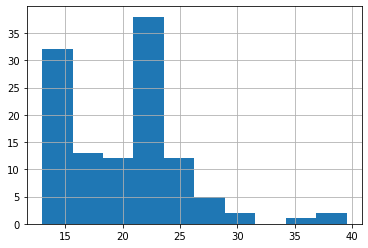

In [58]:
Twenty_o_eight = mpg[mpg.year == 2008]
Ninety_nine = mpg[mpg.year == 1999]

Ninety_nine.average_mpg.hist()

<AxesSubplot:>

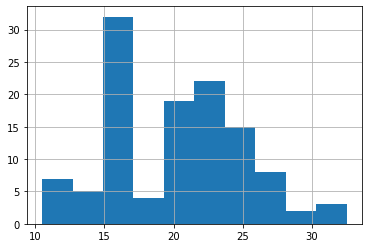

In [59]:
Twenty_o_eight.average_mpg.hist()

In [60]:
t, p = stats.ttest_ind(Ninety_nine.average_mpg, Twenty_o_eight.average_mpg)
t,p

(0.21960177245940962, 0.8263744040323578)

In [62]:
if p < a:
    print("We reject the null hypothesis that they are the same")
    print("We move forward with the alternative hypothesis.")
else: 
    print("We fail to reject the null hypothesis that there is no difference in fuel-efficiency in cars from 2008 and cars from 1999.")

We fail to reject the null hypothesis that there is no difference in fuel-efficiency in cars from 2008 and cars from 1999.


* <font color = 'red'>Are compact cars more fuel-efficient than the average car?<font color = 'black'>

In [10]:
compact = mpg[mpg['class'] == 'compact']
compact.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


<AxesSubplot:>

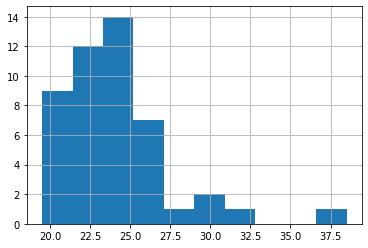

In [11]:
compact.average_mpg.hist()

<AxesSubplot:>

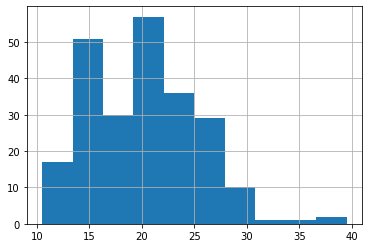

In [12]:
mpg.average_mpg.hist()

In [65]:
null_hypothesis = "There is no difference in the fuel efficiency of subcompacts and the average car."
alternative_hypothesis = "Subcompacts have better fuel efficience than the average car"

#consider using harmonic mean instead because we are average unit rates

mpg['average_mpg'] = stats.hmean(mpg[['cty','hwy']], axis = 1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [67]:
mpg_08 = mpg[mpg.year == 2008].average_mpg
mpg_99 = mpg[mpg.year == 1999].average_mpg

In [69]:
t, p = stats.ttest_ind(mpg_08, mpg_99)
t, p

(-0.3011962975077886, 0.7635345888327115)

In [70]:
print(f'''
Because p ({p:.3f}) > alpha (.05), we fail to reject the null\
 hypothesis that there is no difference in fuel-efficency in cars\
 from 2008 and 1999.
''')


Because p (0.764) > alpha (.05), we fail to reject the null hypothesis that there is no difference in fuel-efficency in cars from 2008 and 1999.



In [71]:
mpg_08.mean(), mpg_99.mean()

(19.488662986569054, 19.68238764869729)

**2.  Are compact cars more fuel-efficient than the average car?**
 (1-sample, 1-tailed t-test)

In [73]:
# Null Hypothesis:  There is no difference in fuel-efficiency between compact cars and the average car in the population.
# Alternative:  Compact cars are more fuel efficient than the average car

#for Alt to be true, t>0 and p/2 < 0.05


mpg_compact = mpg[mpg['class'] == 'compact'].average_mpg
μ = mpg.average_mpg.mean()

t, p = stats.ttest_1samp(mpg_compact, μ)
t,p


(7.512360093161354, 1.5617666348807727e-09)

In [74]:
print("Because p/2 < alpha (.05), we reject the null hypothesis that there is no difference in fuel-efficiency in compact cars and the average car population.")

Because p/2 < alpha (.05), we reject the null hypothesis that there is no difference in fuel-efficiency in compact cars and the average car population.


**Do manual cars get better gas mileage than automatic cars?**

* Null = "There is no difference in fuel-efficiency between manual and automatic cars."
* Ha = "There is a difference in fuel-efficiency between manual and automatic cars."
    
    

In [75]:
mpg_auto = mpg[mpg.trans.str.contains('auto')].average_mpg
mpg_manual = mpg[mpg.trans.str.contains('manual')].average_mpg

t, p = stats.ttest_ind(mpg_manual,mpg_auto)
t, p

(4.652577547151351, 5.510464610044005e-06)

In [79]:
print("Because p/2 < alpha (.05), we reject the null hypothesis that there is no difference in gas mileage between manual and automatic cars.")

Because p/2 < alpha (.05), we reject the null hypothesis that there is no difference in gas mileage between manual and automatic cars.


Text(0.5, 1.0, 'Is mileage different by transmission type?')

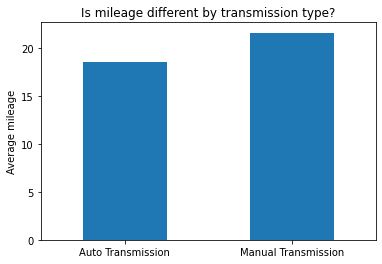

In [81]:
mpg['transmission_type'] = np.where(mpg.trans.str.contains('auto'), 'Auto Transmission', 'Manual Transmission')

mpg.groupby('transmission_type').average_mpg.mean().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Average mileage')
plt.title('Is mileage different by transmission type?')

### Correlation Exercises

Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats
from pydataset import data

telco = pd.read_csv('Cust_Churn_Telco.csv')
telco.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [4]:
telco.dropna()
telco


# in the event of nans:  
#. df = df.dropna()

# in the event of empty strings

telco['TotalCharges'] = (telco.TotalCharges + '0').astype(float)

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [44]:
# n = telco.shape[0]
# degf = n - 2
# conf_interval = .95
# α = 1 - conf_interval

x = telco.tenure
y = telco.MonthlyCharges

In [45]:
# def stdev(x):
#     variance = ((x - x.mean()) ** 2).sum()/n
#     return sqrt(variance)

# r_xy = (((x - x.mean()) * (y - y.mean())).sum()/n)/(stdev(x) * stdev(y))
# r_xy

In [46]:
# t = (r_xy * sqrt(n-2)) / sqrt(1-r_xy**2)
# t

In [47]:
# p  = stats.t.sf(t, df=degf) * 2
# p

In [48]:
# p < α

<font color='red'>**Does tenure correlate with monthly charges?** <font color = 'black'>

In [49]:
corr, p = stats.pearsonr(x,y)
corr, p

(0.24789985628615002, 4.0940449915016345e-99)

<font color='red'>**Does tenure correlate with total charges?** <font color = 'black'>

In [57]:
# telco.dropna()

# x = telco.tenure
# y = telco.TotalCharges

# corr, p = stats.pearsonr(x,y)
# corr, p

In [ ]:
alldata_balance = alldata[(alldata[IBRD] !=0) | (alldata[IMF] !=0)]

In [ ]:
services_telco = non_na_telco[(non_na_telco.PhoneService == 'Yes')&(non_na_telco.InternetService != 'No')]

In [ ]:
numbahz = pd.read_sql('SELECT * FROM employees JOIN salaries ON (employees.emp_no = salaries.emp_no)', get_db_url('employees'))

In [ ]:
salaries['hire_date']= pd.to_datetime(salaries['hire_date'])

In [52]:
numbahz["time_here"] = (date.today() - numbahz['hire_date']).dt.days

NameError: name 'date' is not defined

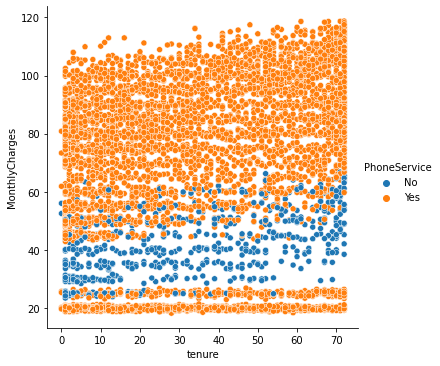

In [8]:
sns.relplot(x='tenure', y='MonthlyCharges', hue='PhoneService',data=telco)

Use the ```employees``` database.
* Is there a relationship between how long an employee has been with the company and their salary?
* Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [9]:
#get environment set up

from env import user, password, host
from sqlalchemy import create_engine
def get_connection(db, user, host, password):
    url = f'mysql+pymysql://{user}:{password}@{host}/{db}'
    return create_engine(url)

ModuleNotFoundError: No module named 'env'

<font color = 'red'>3. Use the sleepstudy data. Is there a relationship between days and reaction time?<font color = 'black'>

In [55]:
sleepstudy = data('sleepstudy')
sleepstudy

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


In [56]:
x = sleepstudy.Days
y = sleepstudy.Reaction

corr, p = stats.pearsonr(x,y)
corr, p

(0.5352302262650253, 9.894096322214812e-15)

### Chi-Squared Exercises

1.  Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

               Codeup Student        Not Codeup Student 
               
Uses a Macbook	           49	              20

Doesn't Use A Macbook	    1	              30


In [ ]:
# Find the proportions:

Codeup Student = .5
Not Codeup Student = .5
Uses Macbook = .69
No Macbook = .31

In [37]:
conf_interval = 0.95
alpha = 1 - conf_interval

contingency = pd.DataFrame({'codeup_student':[49,1], 'not_codeup':[20,30]}, index = ['uses_macbook','not_macbook'])
contingency

,codeup_student,not_codeup
uses_macbook,49,20
not_macbook,1,30


In [39]:
index = ['MacBook', 'No_Macbook']
columns = ['Codeup', 'Not_Codeup']
observed = pd.DataFrame ([[49, 20],[1, 31]], index = index, columns = columns)
n = observed.values.sum()

chi2 = ((observed - expected)**2 / expected).values.sum()

nrows, ncols = observed.shape

degrees_of_freedom = (nrows -1) * (ncols -1)
p = stats.chi2(degrees_of_freedom).sf(chi2)

print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---/n')
print(f'chi^2 = {chi2:.4f}')
print(f'p.    = {p:.4f}')


chi2,p,degf,expected = stats.chi2_contingency(contingency)

Observed
            Codeup  Not_Codeup
MacBook         49          20
No_Macbook       1          31
---
Expected
[[34.5 34.5]
 [15.5 15.5]]
---/n
chi^2 = 41.2529
p.    = 0.0000


**Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.**

In [21]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [42]:
#H0: Class is independent of the drivetrain type. 
#Alternative: they are dependent

#crosstab for drv and class 
observed = pd.crosstab(mpg.drv, mpg['class'])
observed

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
drv,,,,,,,
4,0,12,3,0,33,4,51
f,0,35,38,11,0,22,0
r,5,0,0,0,0,9,11


In [43]:
# Set our alpha
alpha = .01

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null")

We reject the null hypothesis


In [44]:
p

1.1048811174475079e-40

In [45]:
chi2

221.6011438535253

In [46]:
observed

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
drv,,,,,,,
4,0,12,3,0,33,4,51
f,0,35,38,11,0,22,0
r,5,0,0,0,0,9,11


In [47]:
expected

array([[ 2.2008547 , 20.68803419, 18.04700855,  4.84188034, 14.52564103,
        15.40598291, 27.29059829],
       [ 2.26495726, 21.29059829, 18.57264957,  4.98290598, 14.94871795,
        15.85470085, 28.08547009],
       [ 0.53418803,  5.02136752,  4.38034188,  1.17521368,  3.52564103,
         3.73931624,  6.62393162]])

Use the data from the employees database to answer these questions:

* Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
* Is an employee's gender independent of whether or not they are or have been a manager?

In [ ]:
#set up sql connection

def get_connection()